In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, models, transforms
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from scipy import stats
import copy
import pickle

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("../data_process/df_merged_tract_large.csv")

In [3]:
df.head()

,CENSUS_ID,R_AGE_IMP,DRVRCNT,HHSIZE,HHFAMINC,HBHTNRNT,HBPPOPDN,HBRESDN,TRPMILES,TRVLCMIN,...,TRPTRANS_2_mean_norm,TRPTRANS_3_mean_norm,TRIPPURP_0_mean_norm,TRIPPURP_1_mean_norm,TRIPPURP_2_mean_norm,TRIPPURP_3_mean_norm,TRIPPURP_4_mean_norm,density,diversity,design
0,1001020802,54,2,2,20.0,0.1,300,50,13.430,20,...,0.675344,-0.310812,-0.993544,-1.724233,-1.047661,0.018457,3.081432,0.000000,0.000000,0.003806
1,1003010300,49,2,3,112.5,0.1,50,50,10.364,7,...,0.675344,-0.310812,0.029258,1.476451,0.047744,-1.238231,-0.390720,0.000000,0.000000,0.013154
2,1003010703,39,2,4,112.5,0.1,300,300,6.264,12,...,0.675344,-0.310812,0.793327,0.749023,-1.047661,0.761045,-1.147251,0.005631,0.190895,0.111964
3,1003011202,49,3,4,62.5,0.3,1500,1500,3.992,15,...,-0.044711,-0.310812,0.612922,3.133949,0.116207,-1.238231,-2.372111,0.002344,0.999932,0.118858
4,1003011401,69,2,2,87.5,0.2,300,300,10.131,30,...,0.675344,-0.310812,0.612922,0.704858,-0.465727,-0.138629,-0.687929,0.000001,0.000000,0.029466


In [4]:
print(list(df.columns))

['CENSUS_ID', 'R_AGE_IMP', 'DRVRCNT', 'HHSIZE', 'HHFAMINC', 'HBHTNRNT', 'HBPPOPDN', 'HBRESDN', 'TRPMILES', 'TRVLCMIN', 'HHVEHCNT_P_CAP', 'TRPTRANS_0', 'TRPTRANS_1', 'TRPTRANS_2', 'TRPTRANS_3', 'TRIPPURP_0', 'TRIPPURP_1', 'TRIPPURP_2', 'TRIPPURP_3', 'TRIPPURP_4', 'HHVEHCNT', 'R_SEX_IMP_1', 'R_SEX_IMP_2', 'EDUC_1', 'EDUC_2', 'HH_RACE_1', 'HH_RACE_2', 'HOMEOWN_0', 'HOMEOWN_1', 'HOMEOWN_2', 'HBHUR_C', 'HBHUR_R', 'HBHUR_S', 'HBHUR_T', 'HBHUR_U', 'R_AGE_IMP_mean', 'DRVRCNT_mean', 'HHSIZE_mean', 'HHFAMINC_mean', 'HBHTNRNT_mean', 'HBPPOPDN_mean', 'HBRESDN_mean', 'TRPMILES_mean', 'TRVLCMIN_mean', 'HHVEHCNT_P_CAP_mean', 'TRPTRANS_0_mean', 'TRPTRANS_1_mean', 'TRPTRANS_2_mean', 'TRPTRANS_3_mean', 'TRIPPURP_0_mean', 'TRIPPURP_1_mean', 'TRIPPURP_2_mean', 'TRIPPURP_3_mean', 'TRIPPURP_4_mean', 'HHVEHCNT_mean', 'R_SEX_IMP_1_mean', 'R_SEX_IMP_2_mean', 'EDUC_1_mean', 'EDUC_2_mean', 'HH_RACE_1_mean', 'HH_RACE_2_mean', 'HOMEOWN_0_mean', 'HOMEOWN_1_mean', 'HOMEOWN_2_mean', 'HBHUR_C_mean', 'HBHUR_R_mean', 'H

In [5]:
import os

In [6]:
model_paths = sorted(os.listdir("../models"))
regression_models = []
cnn_models = []
for elt in model_paths:
    print(elt)
    #print(elt[len(elt)-3:len(elt)])
    if elt[len(elt)-3:len(elt)] == "pth":
        cnn_models.append(elt)
    else:
        regression_models.append(elt)
print(len(regression_models))
print(len(cnn_models))

HHVEHCNT_P_CAP_mean_norm_BE and NHTS linear.pickle
HHVEHCNT_P_CAP_mean_norm_BE and NHTS quadratic.pickle
HHVEHCNT_P_CAP_mean_norm_BE linear.pickle
HHVEHCNT_P_CAP_mean_norm_BE quadratic.pickle
HHVEHCNT_P_CAP_mean_norm_NHTS linear.pickle
HHVEHCNT_P_CAP_mean_norm_NHTS quadratic.pickle
HHVEHCNT_mean_norm_BE and NHTS linear.pickle
HHVEHCNT_mean_norm_BE and NHTS quadratic.pickle
HHVEHCNT_mean_norm_BE linear.pickle
HHVEHCNT_mean_norm_BE quadratic.pickle
HHVEHCNT_mean_norm_NHTS linear.pickle
HHVEHCNT_mean_norm_NHTS quadratic.pickle
TRPTRANS_1_mean_norm_BE and NHTS linear.pickle
TRPTRANS_1_mean_norm_BE and NHTS quadratic.pickle
TRPTRANS_1_mean_norm_BE linear.pickle
TRPTRANS_1_mean_norm_BE quadratic.pickle
TRPTRANS_1_mean_norm_NHTS linear.pickle
TRPTRANS_1_mean_norm_NHTS quadratic.pickle
TRPTRANS_2_mean_norm_BE and NHTS linear.pickle
TRPTRANS_2_mean_norm_BE and NHTS quadratic.pickle
TRPTRANS_2_mean_norm_BE linear.pickle
TRPTRANS_2_mean_norm_BE quadratic.pickle
TRPTRANS_2_mean_norm_NHTS linear.pi

In [7]:
for model_path in model_paths:
    model = sm.load("../models/" + model_path)
    print(model)

119547037146038801333356
119547037146038801333356
119547037146038801333356
119547037146038801333356
119547037146038801333356
119547037146038801333356
119547037146038801333356
119547037146038801333356
119547037146038801333356
119547037146038801333356
119547037146038801333356
119547037146038801333356
119547037146038801333356
119547037146038801333356
119547037146038801333356


In [8]:
df = pd.read_csv("../data_process/df_merged_tract_large.csv")
print(df.shape)
size = df.shape[0]

(18491, 103)


In [9]:
# read latent vectors 
import pickle
with open('../data_process/last_layer_dic_train.pickle', 'rb') as h:
    last_layer_dic_train = pickle.load(h)

with open('../data_process/last_layer_dic_test.pickle', 'rb') as h:
    last_layer_dic_test = pickle.load(h)

In [10]:
output_var_list=['HHVEHCNT_mean_norm', 'HHVEHCNT_P_CAP_mean_norm', 'TRPTRANS_1_mean_norm', 'TRPTRANS_2_mean_norm', 'TRPTRANS_3_mean_norm']
input_var=['R_AGE_IMP_mean', 'HHSIZE_mean', 'HHFAMINC_mean', 'HBHTNRNT_mean', 'HBPPOPDN_mean', 'HBRESDN_mean', 
           'R_SEX_IMP_2_mean', 'EDUC_2_mean', 'HH_RACE_2_mean', 'HOMEOWN_1_mean', 'HOMEOWN_2_mean',
           'HBHUR_R_mean', 'HBHUR_S_mean', 'HBHUR_T_mean','HBHUR_U_mean']
BE_var = ['density', 'diversity', 'design']
input_structure_list = ['BE linear', 'BE quadratic', 'NHTS linear', 'NHTS quadratic', 'BE and NHTS linear', 'BE and NHTS quadratic']

In [11]:
def initialize_data_linear_reg(df, BE_var, output_var, input_var, last_layer_dic_train, last_layer_dic_test, size, input_structure):
    # output: x train and test, y train and test.
    y_ = df[output_var].values 
    y = copy.deepcopy(y_)
    x = df[input_var]
    BE = df[BE_var]
    census_ids = copy.deepcopy(df["CENSUS_ID"].values)
    
    #no randomization here
    shuffle_idx = np.arange(size)
    #np.random.seed(0) # Keey this seed consistent across scripts.
    #np.random.shuffle(shuffle_idx)
    train_ratio = 0.8 # Keey this consistent across scripts.

    # train test.
    y_train = y[shuffle_idx[:int(train_ratio*size)]].astype("float32")
    y_test = y[shuffle_idx[int(train_ratio*size):]].astype("float32")
    BE_train = BE.values[shuffle_idx[:int(train_ratio*size)]].astype("float32")
    BE_test = BE.values[shuffle_idx[int(train_ratio*size):]].astype("float32")
    x_train = x.values[shuffle_idx[:int(train_ratio*size)]].astype("float32")
    x_test = x.values[shuffle_idx[int(train_ratio*size):]].astype("float32")
    # 
    cnn_vector_train=last_layer_dic_train[output_var] 
    cnn_vector_test=last_layer_dic_test[output_var]
    
    if input_structure == 'BE linear':
        x_train_ = sm.add_constant(BE_train)
        x_test_ = sm.add_constant(BE_test)
        y_train_ = y_train[:]
        y_test_ = y_test[:]

    elif input_structure == 'BE quadratic':
        poly = PolynomialFeatures(2, interaction_only = False, include_bias=True)
        x_train_ = poly.fit_transform(BE_train)
        x_test_ = poly.fit_transform(BE_test)
        y_train_ = y_train[:]
        y_test_ = y_test[:]
        
    elif input_structure == 'NHTS linear':
        x_train_ = sm.add_constant(x_train)
        x_test_ = sm.add_constant(x_test)
        y_train_ = y_train[:]
        y_test_ = y_test[:]

    elif input_structure == 'NHTS quadratic': # I have concern about its computational problem.
        poly = PolynomialFeatures(2, interaction_only = False, include_bias=True)
        x_train_ = poly.fit_transform(x_train)
        x_test_ = poly.fit_transform(x_test)
        y_train_ = y_train[:]
        y_test_ = y_test[:]
        
    elif input_structure == 'BE and NHTS linear':
        x_train_ = sm.add_constant(np.concatenate([x_train, BE_train], axis = 1))
        x_test_ = sm.add_constant(np.concatenate([x_test, BE_test], axis = 1))
        y_train_ = y_train[:]
        y_test_ = y_test[:]
        
    elif input_structure == 'BE and NHTS quadratic': # I have concern about its computational problem. 
        poly = PolynomialFeatures(2, interaction_only = False, include_bias=True)
        x_train_ = poly.fit_transform(np.concatenate([x_train, BE_train], axis = 1))
        x_test_ = poly.fit_transform(np.concatenate([x_test, BE_test], axis = 1))
        y_train_ = y_train[:]
        y_test_ = y_test[:]

    elif input_structure == 'CNN and NHTS linear':
        x_train_ = sm.add_constant(np.concatenate([x_train, cnn_vector_train], axis = 1))
        x_test_ = sm.add_constant(np.concatenate([x_test, cnn_vector_test], axis = 1))
        y_train_ = y_train[:]
        y_test_ = y_test[:]

    elif input_structure == 'CNN BE NHTS linear':
        x_train_ = sm.add_constant(np.concatenate([x_train, BE_train, cnn_vector_train], axis = 1))
        x_test_ = sm.add_constant(np.concatenate([x_test, BE_test, cnn_vector_test], axis = 1))
        y_train_ = y_train[:]
        y_test_ = y_test[:]

    return x_train_, x_test_, y_train_, y_test_, census_ids

In [12]:
for model in regression_models:
    helper = model.split("_")
    output_var = "_".join(helper[:-1])
    input_structure = helper[-1].split(".")[0]
    print(output_var)
    print(input_structure)

HHVEHCNT_P_CAP_mean_norm
BE and NHTS linear
HHVEHCNT_P_CAP_mean_norm
BE and NHTS quadratic
HHVEHCNT_P_CAP_mean_norm
BE linear
HHVEHCNT_P_CAP_mean_norm
BE quadratic
HHVEHCNT_P_CAP_mean_norm
NHTS linear
HHVEHCNT_P_CAP_mean_norm
NHTS quadratic
HHVEHCNT_mean_norm
BE and NHTS linear
HHVEHCNT_mean_norm
BE and NHTS quadratic
HHVEHCNT_mean_norm
BE linear
HHVEHCNT_mean_norm
BE quadratic
HHVEHCNT_mean_norm
NHTS linear
HHVEHCNT_mean_norm
NHTS quadratic
TRPTRANS_1_mean_norm
BE and NHTS linear
TRPTRANS_1_mean_norm
BE and NHTS quadratic
TRPTRANS_1_mean_norm
BE linear
TRPTRANS_1_mean_norm
BE quadratic
TRPTRANS_1_mean_norm
NHTS linear
TRPTRANS_1_mean_norm
NHTS quadratic
TRPTRANS_2_mean_norm
BE and NHTS linear
TRPTRANS_2_mean_norm
BE and NHTS quadratic
TRPTRANS_2_mean_norm
BE linear
TRPTRANS_2_mean_norm
BE quadratic
TRPTRANS_2_mean_norm
NHTS linear
TRPTRANS_2_mean_norm
NHTS quadratic
TRPTRANS_3_mean_norm
BE and NHTS linear
TRPTRANS_3_mean_norm
BE and NHTS quadratic
TRPTRANS_3_mean_norm
BE linear
TRPTRA

In [13]:
for model_path in regression_models:
    helper = model_path.split("_")
    output_var = "_".join(helper[:-1])
    input_structure = helper[-1].split(".")[0]
    print(output_var)
    print(input_structure)
    x_train, x_test, y_train, y_test, census_ids = initialize_data_linear_reg(df, BE_var, output_var, input_var, last_layer_dic_train, last_layer_dic_test, size, input_structure)
    print(x_train.shape)
    print(x_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    print(census_ids.shape)
    x = np.vstack((x_train,x_test))
    y = np.append(y_train,y_test)
    print(x.shape)
    print(y.shape)
index_to_census_id = {i:id for i, id in enumerate(census_ids)}

HHVEHCNT_P_CAP_mean_norm
BE and NHTS linear
(14792, 19)
(3699, 19)
(14792,)
(3699,)
(18491,)
(18491, 19)
(18491,)
HHVEHCNT_P_CAP_mean_norm
BE and NHTS quadratic
(14792, 190)
(3699, 190)
(14792,)
(3699,)
(18491,)
(18491, 190)
(18491,)
HHVEHCNT_P_CAP_mean_norm
BE linear
(14792, 4)
(3699, 4)
(14792,)
(3699,)
(18491,)
(18491, 4)
(18491,)
HHVEHCNT_P_CAP_mean_norm
BE quadratic
(14792, 10)
(3699, 10)
(14792,)
(3699,)
(18491,)
(18491, 10)
(18491,)
HHVEHCNT_P_CAP_mean_norm
NHTS linear
(14792, 16)
(3699, 16)
(14792,)
(3699,)
(18491,)
(18491, 16)
(18491,)
HHVEHCNT_P_CAP_mean_norm
NHTS quadratic
(14792, 136)
(3699, 136)
(14792,)
(3699,)
(18491,)
(18491, 136)
(18491,)
HHVEHCNT_mean_norm
BE and NHTS linear
(14792, 19)
(3699, 19)
(14792,)
(3699,)
(18491,)
(18491, 19)
(18491,)
HHVEHCNT_mean_norm
BE and NHTS quadratic
(14792, 190)
(3699, 190)
(14792,)
(3699,)
(18491,)
(18491, 190)
(18491,)
HHVEHCNT_mean_norm
BE linear
(14792, 4)
(3699, 4)
(14792,)
(3699,)
(18491,)
(18491, 4)
(18491,)
HHVEHCNT_mean_norm

In [14]:
index_to_census_id

{0: 1001020802,
 1: 1003010300,
 2: 1003010703,
 3: 1003011202,
 4: 1003011401,
 5: 1003011502,
 6: 1003011602,
 7: 1015001700,
 8: 1031011202,
 9: 1043965500,
 10: 1047956300,
 11: 1049960500,
 12: 1053969900,
 13: 1055011001,
 14: 1059973000,
 15: 1069041900,
 16: 1073004701,
 17: 1073004800,
 18: 1073005000,
 19: 1073005903,
 20: 1073011001,
 21: 1073012905,
 22: 1073012911,
 23: 1073014204,
 24: 1073014413,
 25: 1075030200,
 26: 1077010400,
 27: 1077011604,
 28: 1079979800,
 29: 1081040400,
 30: 1081041700,
 31: 1089000601,
 32: 1089001200,
 33: 1089002600,
 34: 1089010901,
 35: 1091973000,
 36: 1093964700,
 37: 1097003704,
 38: 1097003708,
 39: 1097006301,
 40: 1101005604,
 41: 1103005101,
 42: 1109189000,
 43: 1115040104,
 44: 1115040105,
 45: 1115040501,
 46: 1115040502,
 47: 1117030214,
 48: 1117030216,
 49: 1117030304,
 50: 1117030502,
 51: 1117030605,
 52: 1125012000,
 53: 1125012600,
 54: 1133965800,
 55: 2020000102,
 56: 2020000202,
 57: 2020000203,
 58: 2020000204,
 59: 20

In [15]:
model_summaries = []
plots = []

In [16]:
for model_path in regression_models:
    helper = model_path.split("_")
    output_var = "_".join(helper[:-1])
    input_structure = helper[-1].split(".")[0]
    print(output_var)
    print(input_structure)
    x_train, x_test, y_train, y_test, census_ids = initialize_data_linear_reg(df, BE_var, output_var, input_var, last_layer_dic_train, last_layer_dic_test, size, input_structure)
    
    x = np.vstack((x_train,x_test))
    y = np.append(y_train,y_test)
    with open('../models/' + model_path, 'rb') as h:
        model = pickle.load(h)
    y_predicted = model.predict(x)
    epsilons = y - y_predicted
    original_indices, epsilons_sorted = zip(*sorted(list(zip(np.arange(epsilons.shape[0]), epsilons)), key = lambda x: x[1]))
    model_summaries.append(model.summary())
    plots.append((model_path, original_indices, epsilons_sorted))
    

HHVEHCNT_P_CAP_mean_norm
BE and NHTS linear
HHVEHCNT_P_CAP_mean_norm
BE and NHTS quadratic
HHVEHCNT_P_CAP_mean_norm
BE linear
HHVEHCNT_P_CAP_mean_norm
BE quadratic
HHVEHCNT_P_CAP_mean_norm
NHTS linear
HHVEHCNT_P_CAP_mean_norm
NHTS quadratic
HHVEHCNT_mean_norm
BE and NHTS linear
HHVEHCNT_mean_norm
BE and NHTS quadratic
HHVEHCNT_mean_norm
BE linear
HHVEHCNT_mean_norm
BE quadratic
HHVEHCNT_mean_norm
NHTS linear
HHVEHCNT_mean_norm
NHTS quadratic
TRPTRANS_1_mean_norm
BE and NHTS linear
TRPTRANS_1_mean_norm
BE and NHTS quadratic
TRPTRANS_1_mean_norm
BE linear
TRPTRANS_1_mean_norm
BE quadratic
TRPTRANS_1_mean_norm
NHTS linear
TRPTRANS_1_mean_norm
NHTS quadratic
TRPTRANS_2_mean_norm
BE and NHTS linear
TRPTRANS_2_mean_norm
BE and NHTS quadratic
TRPTRANS_2_mean_norm
BE linear
TRPTRANS_2_mean_norm
BE quadratic
TRPTRANS_2_mean_norm
NHTS linear
TRPTRANS_2_mean_norm
NHTS quadratic
TRPTRANS_3_mean_norm
BE and NHTS linear
TRPTRANS_3_mean_norm
BE and NHTS quadratic
TRPTRANS_3_mean_norm
BE linear
TRPTRA

In [17]:
with open('../outputs/model_summaries.pickle', 'wb') as h:
    pickle.dump(model_summaries, h, protocol=pickle.HIGHEST_PROTOCOL)

In [18]:
with open('../outputs/epsilon_plots.pickle', 'wb') as h:
    pickle.dump(plots, h, protocol=pickle.HIGHEST_PROTOCOL)

In [19]:
with open('../outputs/index_to_census_id_plotting.pickle', 'wb') as h:
    pickle.dump(index_to_census_id, h, protocol=pickle.HIGHEST_PROTOCOL)

In [20]:
percentile0_25_census_id_list = []
percentile75_100_census_id_list = []

HHVEHCNT_P_CAP_mean_norm_BE and NHTS linear.pickle


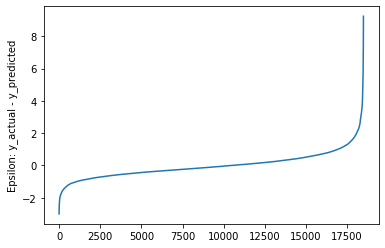

HHVEHCNT_P_CAP_mean_norm_BE and NHTS quadratic.pickle


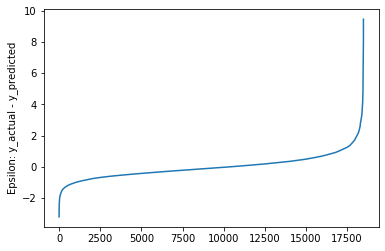

HHVEHCNT_P_CAP_mean_norm_BE linear.pickle


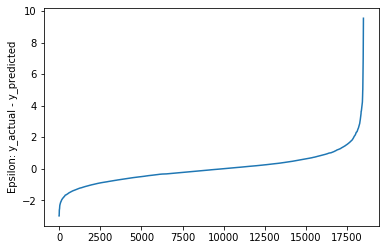

HHVEHCNT_P_CAP_mean_norm_BE quadratic.pickle


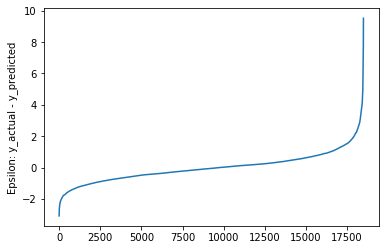

HHVEHCNT_P_CAP_mean_norm_NHTS linear.pickle


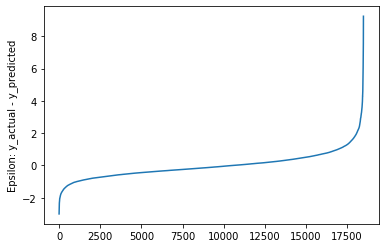

HHVEHCNT_P_CAP_mean_norm_NHTS quadratic.pickle


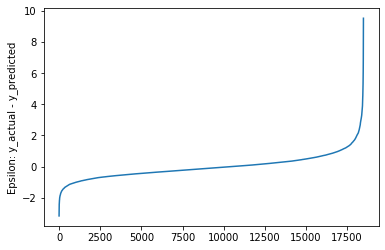

HHVEHCNT_mean_norm_BE and NHTS linear.pickle


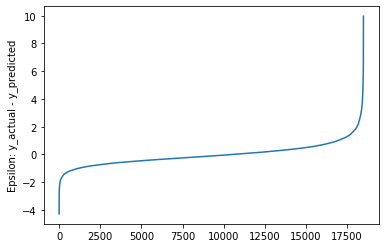

HHVEHCNT_mean_norm_BE and NHTS quadratic.pickle


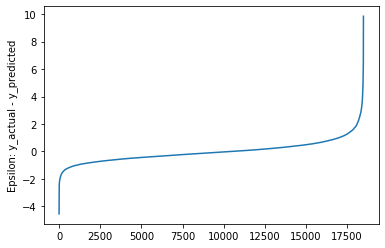

HHVEHCNT_mean_norm_BE linear.pickle


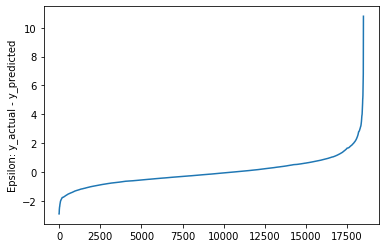

HHVEHCNT_mean_norm_BE quadratic.pickle


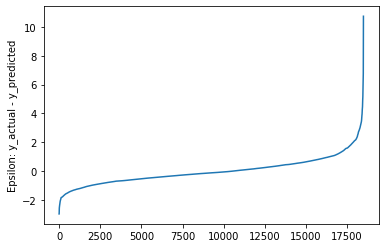

HHVEHCNT_mean_norm_NHTS linear.pickle


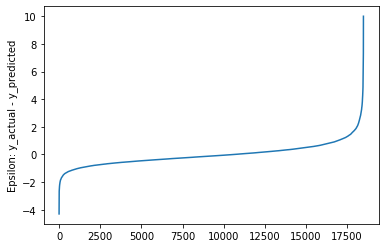

HHVEHCNT_mean_norm_NHTS quadratic.pickle


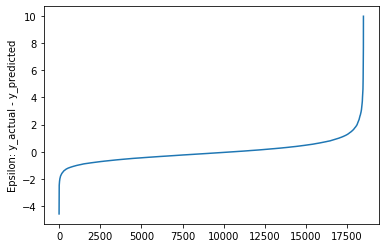

TRPTRANS_1_mean_norm_BE and NHTS linear.pickle


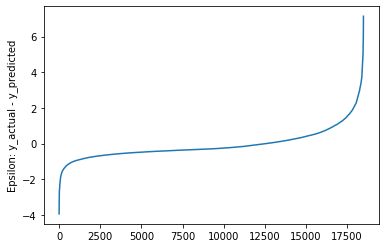

TRPTRANS_1_mean_norm_BE and NHTS quadratic.pickle


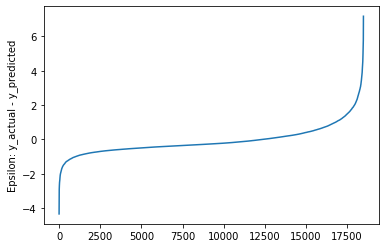

TRPTRANS_1_mean_norm_BE linear.pickle


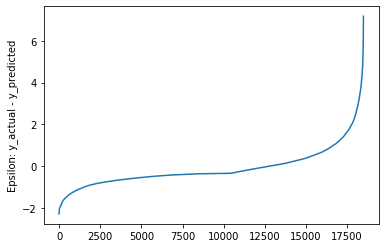

TRPTRANS_1_mean_norm_BE quadratic.pickle


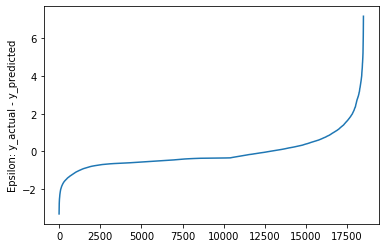

TRPTRANS_1_mean_norm_NHTS linear.pickle


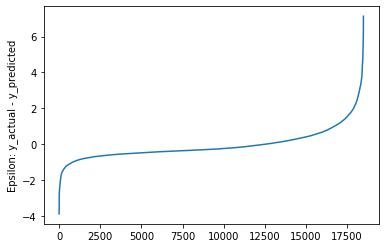

TRPTRANS_1_mean_norm_NHTS quadratic.pickle


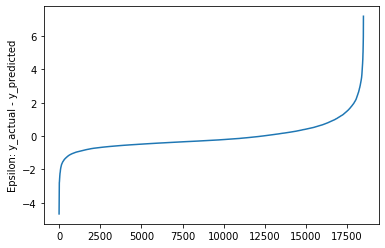

TRPTRANS_2_mean_norm_BE and NHTS linear.pickle


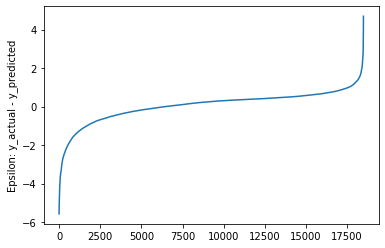

TRPTRANS_2_mean_norm_BE and NHTS quadratic.pickle


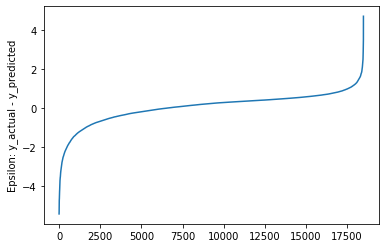

TRPTRANS_2_mean_norm_BE linear.pickle


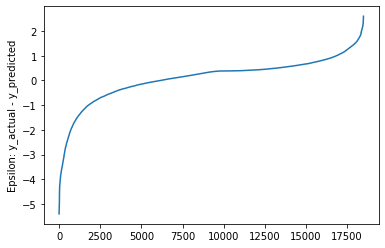

TRPTRANS_2_mean_norm_BE quadratic.pickle


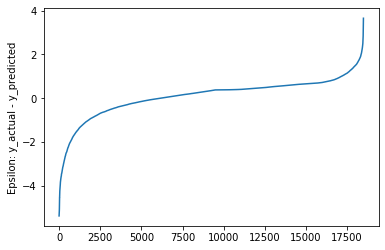

TRPTRANS_2_mean_norm_NHTS linear.pickle


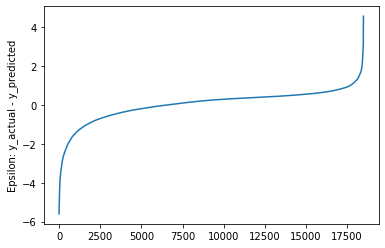

TRPTRANS_2_mean_norm_NHTS quadratic.pickle


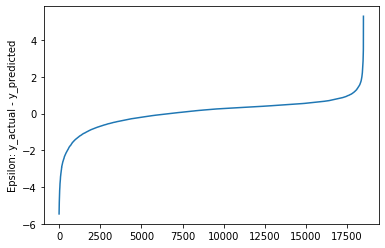

TRPTRANS_3_mean_norm_BE and NHTS linear.pickle


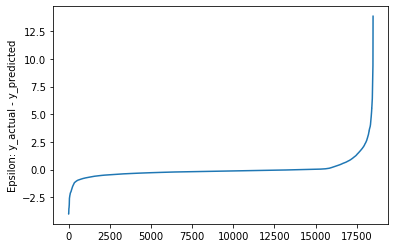

TRPTRANS_3_mean_norm_BE and NHTS quadratic.pickle


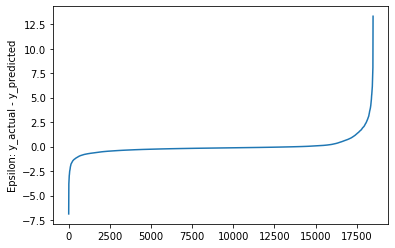

TRPTRANS_3_mean_norm_BE linear.pickle


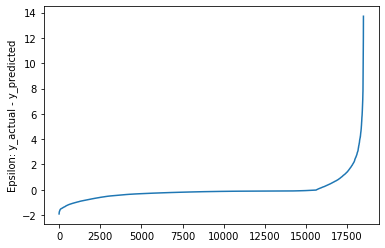

TRPTRANS_3_mean_norm_BE quadratic.pickle


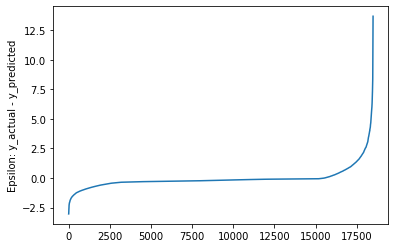

TRPTRANS_3_mean_norm_NHTS linear.pickle


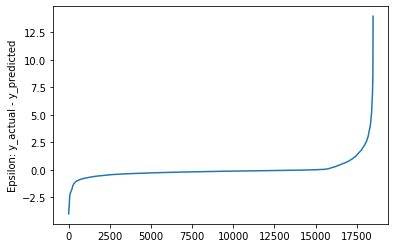

TRPTRANS_3_mean_norm_NHTS quadratic.pickle


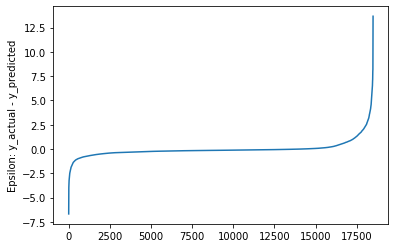

In [21]:
for plot in plots:
    model_path, original_indices, epsilons_sorted = plot
    print(model_path)
    plt.clf()
    plt.plot(epsilons_sorted)
    plt.ylabel("Epsilon: y_actual - y_predicted")
    plt.show()
    n = len(epsilons_sorted)
    percentile0_25 = original_indices[:n//4]
    percentile75_100 = original_indices[(3*n)//4:]
    
    percentile0_25_census_ids = [index_to_census_id[i] for i in percentile0_25]
    percentile75_100_census_ids = [index_to_census_id[i] for i in percentile75_100]
    percentile0_25_census_id_list.append((model_path, percentile0_25_census_ids))
    percentile75_100_census_id_list.append((model_path,percentile75_100_census_ids))
    

In [22]:
with open('../outputs/percentile0_25_census_id_list.pickle', 'wb') as h:
    pickle.dump(percentile0_25_census_id_list, h, protocol=pickle.HIGHEST_PROTOCOL)

with open('../outputs/percentile75_100_census_id_list.pickle', 'wb') as h:
    pickle.dump(percentile75_100_census_id_list, h, protocol=pickle.HIGHEST_PROTOCOL)

    
    